In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('wine-quality-white-and-red.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(6497, 13)

In [6]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [10]:
features = df.drop(columns=['type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

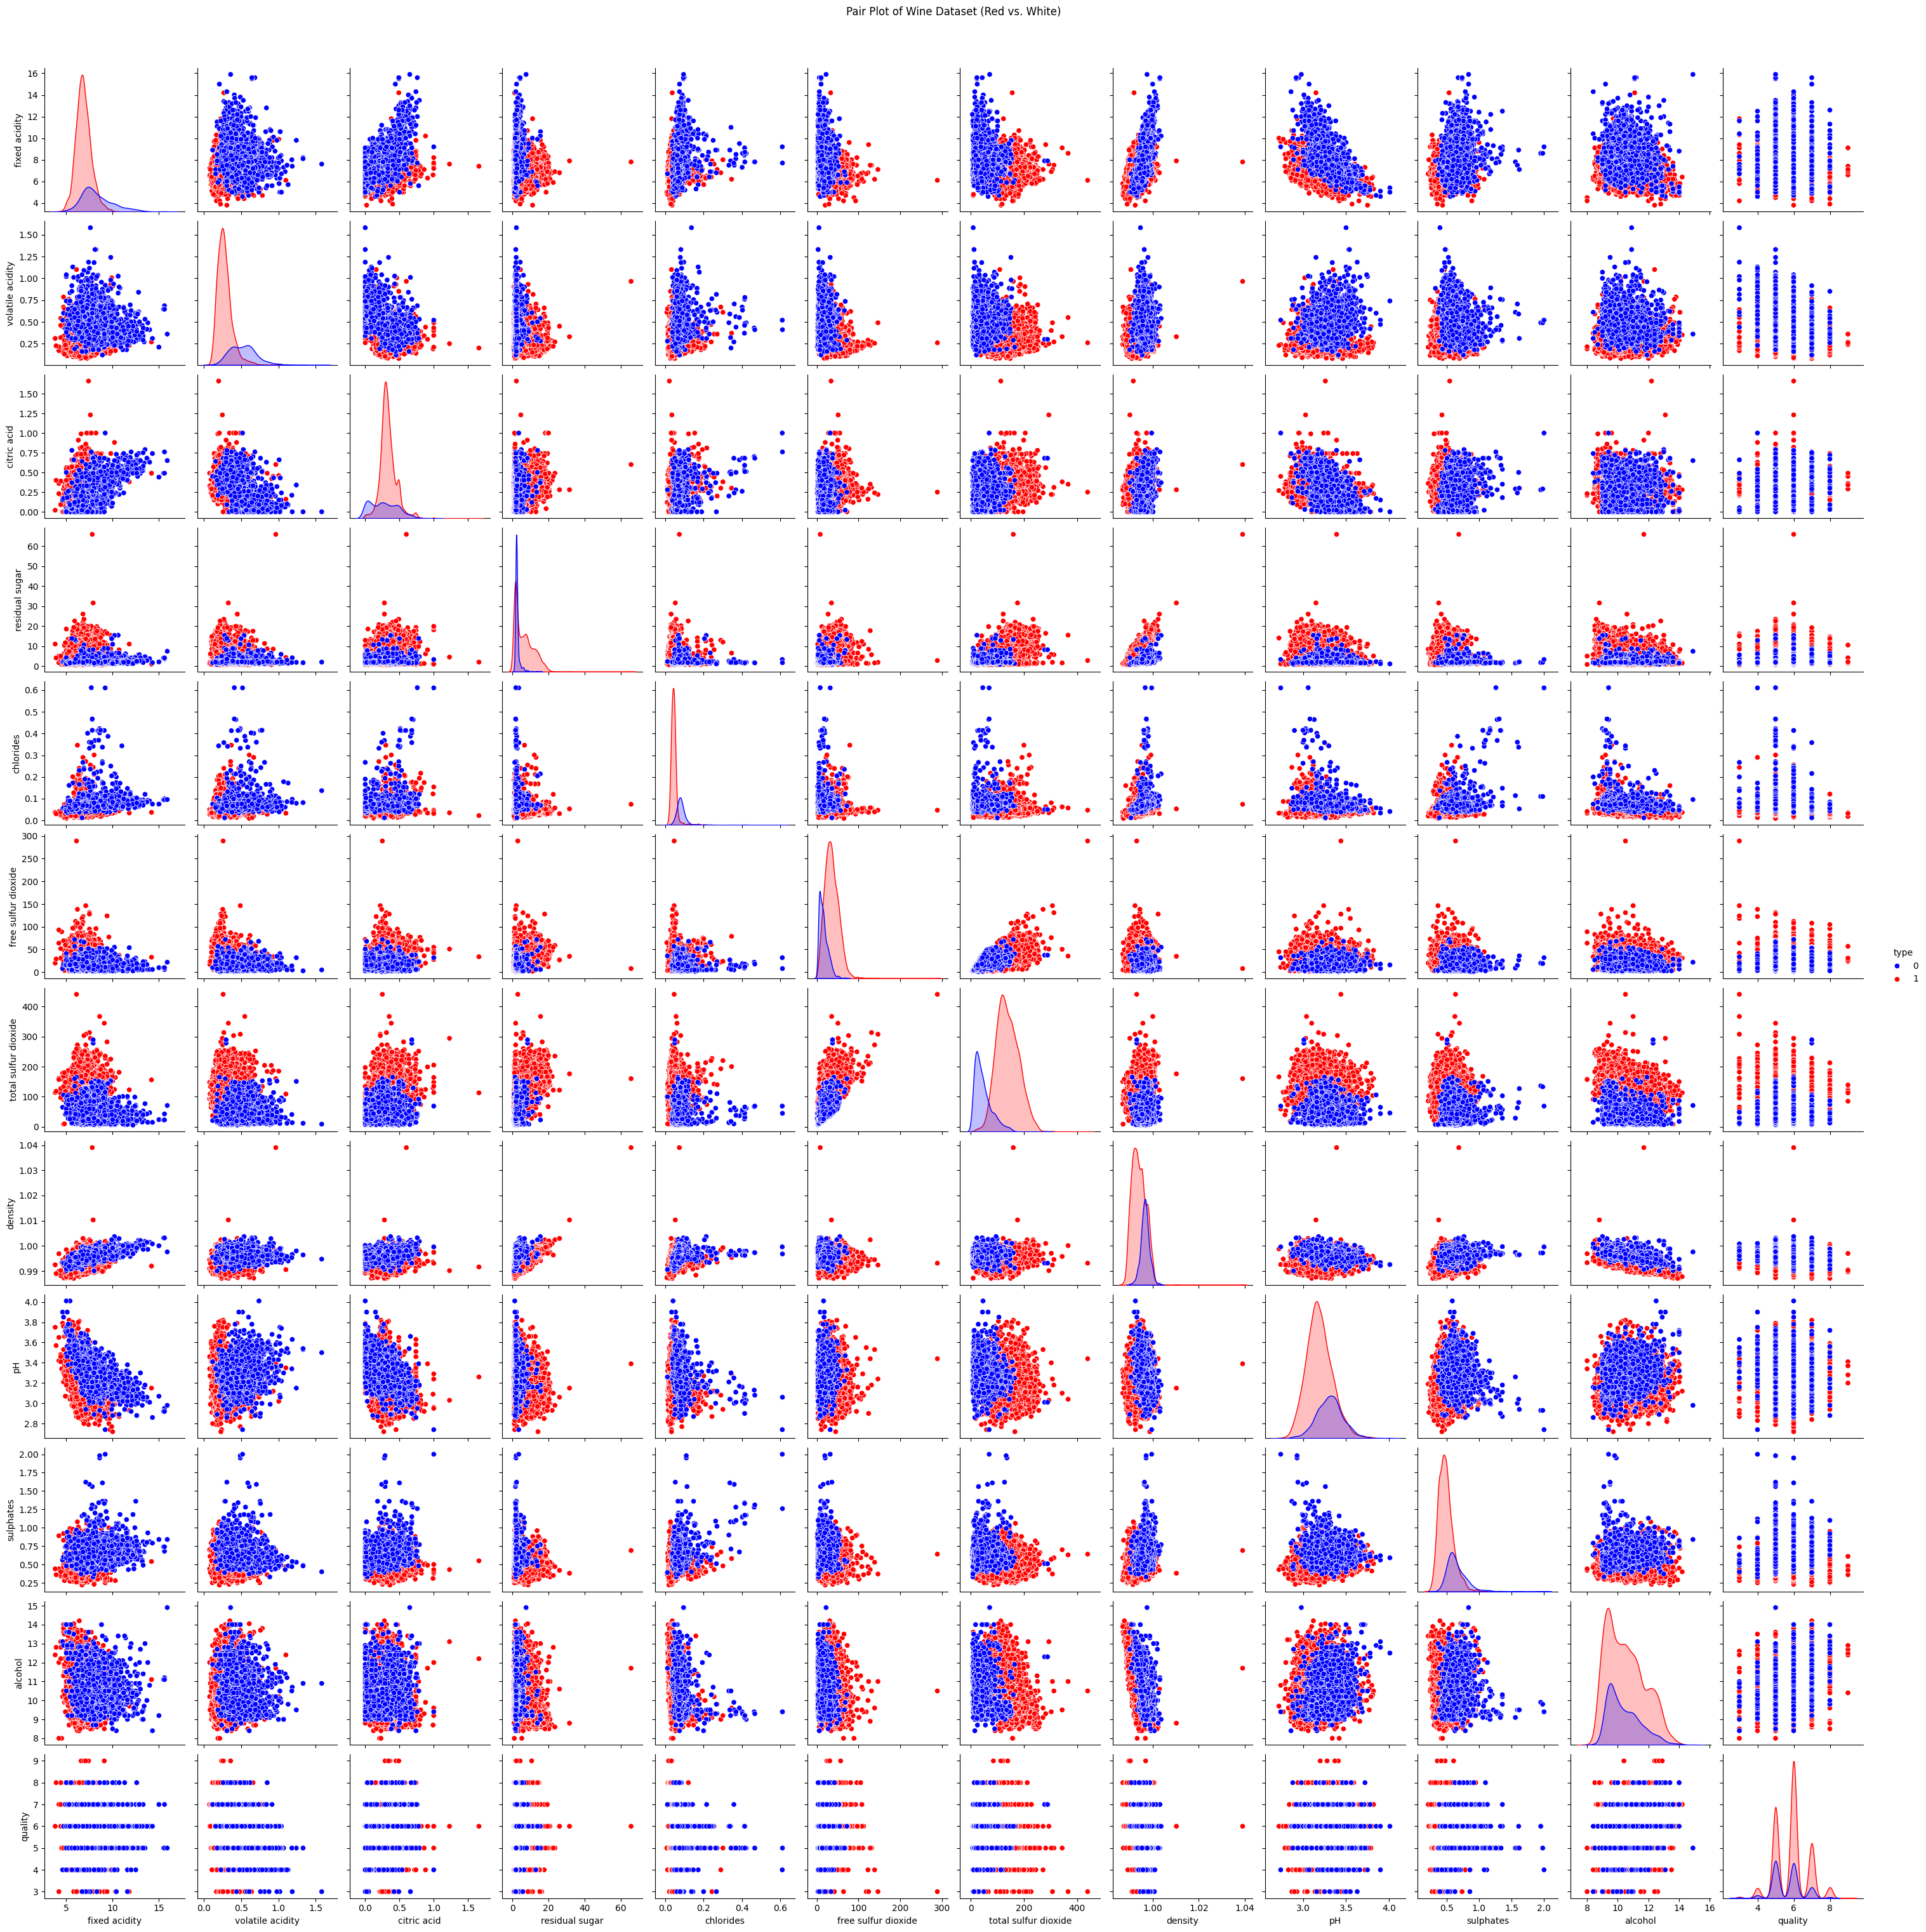

In [11]:
sns.pairplot(df, hue='type', palette=['blue', 'red'], diag_kind='kde')
plt.suptitle('Pair Plot of Wine Dataset (Red vs. White)', y=1.02)
plt.show()

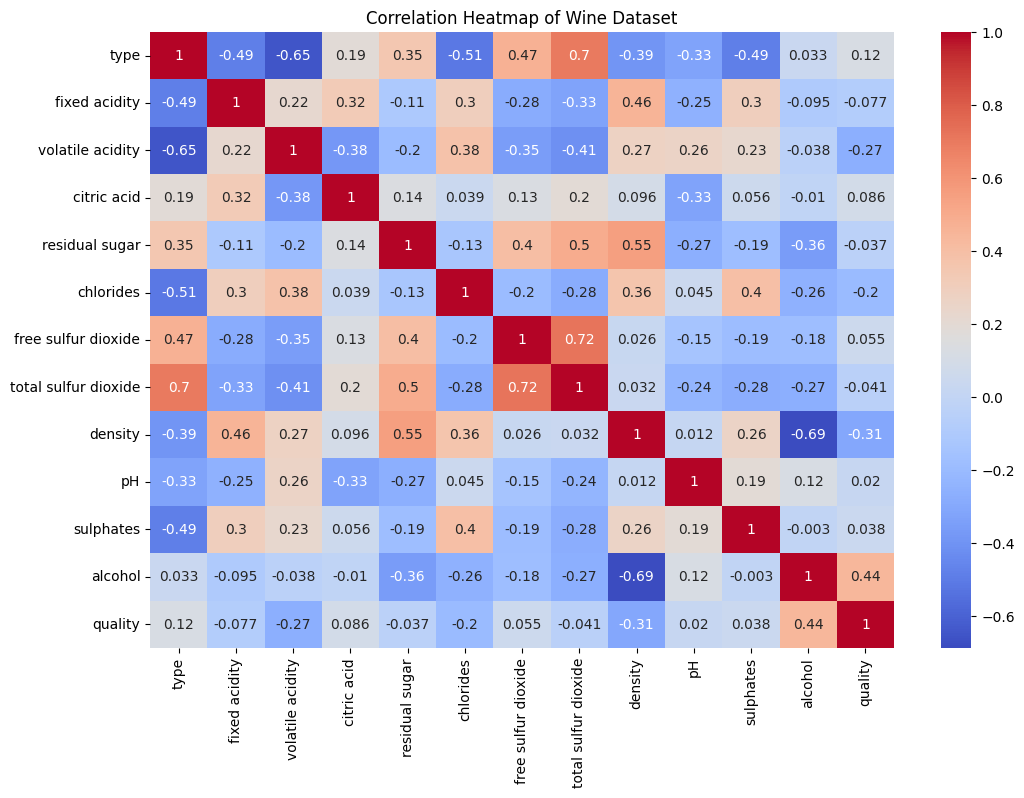

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()

In [13]:
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(scaled_features)

In [14]:
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
pca_df['wine_type'] = df['type']
pca_df['wine_type'] = pca_df['wine_type'].replace({0: 'Red', 1: 'White'})
pca_df


,PC1,PC2,wine_type
0,2.527103,3.141866,White
1,-0.087336,-0.473635,White
2,0.186928,0.290635,White
3,1.757917,0.717144,White
4,1.757917,0.717144,White
...,...,...,...
6492,-2.252150,-0.304009,Red
6493,-1.957682,-1.026289,Red
6494,-2.219490,-0.632503,Red
6495,-2.546139,-0.191879,Red


In [15]:
explained_var = pca.explained_variance_ratio_
print("Variance explained by PC1: ", explained_var[0])
print("Variance explained by PC2: ", explained_var[1])

Variance explained by PC1:  0.253462261062476
Variance explained by PC2:  0.22082116636985458


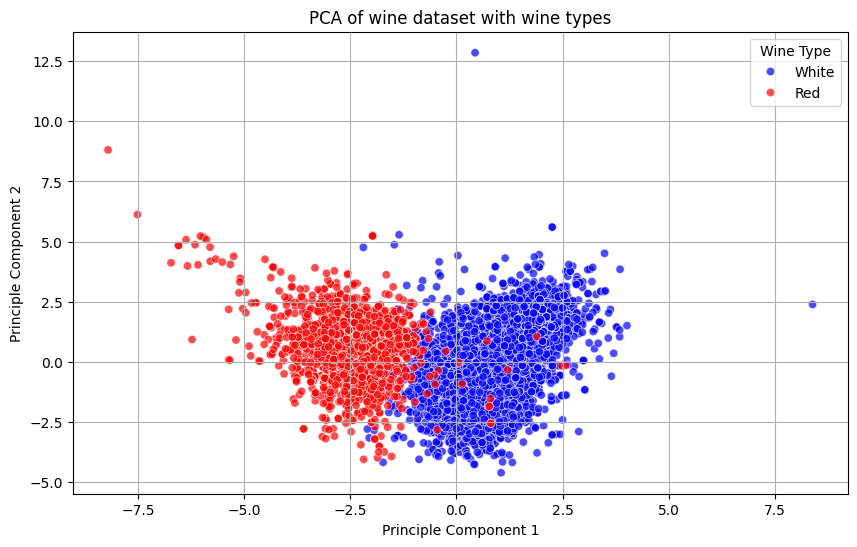

In [16]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = pca_df, x='PC1', y='PC2', hue='wine_type', palette=['blue', 'red'], alpha=0.7)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('PCA of wine dataset with wine types')
plt.legend(title = 'Wine Type')
plt.grid(True)
plt.show()

PCA successfully reduced the dataset's dimensionality while retaining key information to differentiate between red and white wines.
This approach helps in visualizing high-dimensional data, making it easier to classify or cluster samples based on a few principal components.